In [37]:
import numpy as np
import matplotlib.pyplot as plt

import itertools

In [73]:
tblocks = np.array([
    [(0,0),(1,0),(2,0),(3,0),(4,0)],
    [(0,0),(1,0),(2,0),(1,1),(2,-1)],
    [(0,0),(1,0),(2,0),(0,1),(2,-1)],
    [(0,0),(1,0),(2,0),(3,0),(2,1)],
    [(0,0),(1,0),(2,0),(1,1),(1,2)],
    [(0,0),(-1,0),(1,0),(0,1),(0,-1)],
    [(0,0),(1,0),(2,0),(3,0),(0,1)],
    [(0,0),(0,1),(2,0),(2,1),(1,1)],
    [(0,0),(-1,0),(1,0),(1,1),(1,2)],
    [(0,0),(1,0),(0,1),(1,1),(-1,1)],
    [(0,0),(1,0),(0,1),(1,1)],
    [(0,0),(1,0),(1,1),(2,1),(2,2)],
    [(0,0),(1,0),(1,1),(2,1),(3,1)]
])

board_size = 8

# tblocks = np.array([
#     [(0,0)],
#     [(0,0)],
#     [(0,0)],
#     [(0,0),(-1,0)],
#     [(0,0),(-2,0),(-1,0),(0,-1)],
# ])

# board_size = 3

blocks = []
for block in tblocks:
    blocks.append(np.array(block))
blocks = np.array(blocks)

def rot_mat(angle):
    theta = np.radians(angle)
    c, s = np.cos(theta), np.sin(theta)
    R = np.round(np.array(((c,-s), (s, c))))
    return R

def rotation(block, rot=0):
    angles = [0,90,180,270]
    return np.array(list(map(lambda x : np.matmul(rot_mat(angles[rot]), x), block))).astype(int)

def translation(block, vector):
    return np.array(list(map(lambda x : x + vector, block)))    

In [74]:
def move_block(block, setting):
    block = rotation(block,setting[-1])
    block = translation(block,setting[:-1])
    return block

def plot_block(block, setting = [0,0,0], *args, **kwargs):
    block = move_block(block, setting)
    plt.plot(block[:,0], block[:,1], marker='s', linewidth=0, *args, **kwargs)
    
def plot_blocks(blocks, *args, **kwargs):
    fig = plt.figure(figsize=(10,10))
    edges = np.array([[0,0], [0,board_size-1], [board_size-1,board_size-1], [board_size-1,0], [0,0]])
    plt.plot(edges[:,0], edges[:,1], color='r')
    for idx,block in enumerate(blocks):
        plot_block(block, markersize=40)
    plt.xlim(-1, board_size)
    plt.ylim(-1, board_size)

(-1, 8)

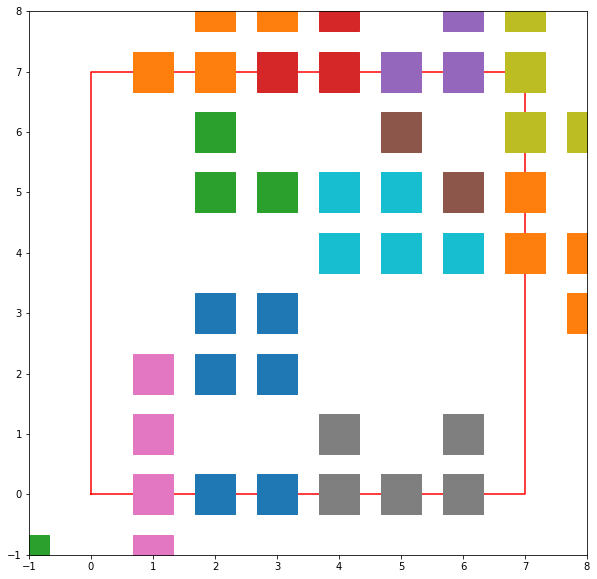

In [75]:
vecs = [np.random.randint(-1,board_size,2) for i in range(len(blocks))]
rots = [np.random.randint(0,4) for i in range(len(blocks))]

settings = [(*vec, rot) for vec,rot in zip(vecs,rots)]

fig = plt.figure(figsize=(10,10))

edges = np.array([[0,0], [0,board_size-1], [board_size-1,board_size-1], [board_size-1,0], [0,0]])
plt.plot(edges[:,0], edges[:,1], color='r')

for idx,block in enumerate(blocks):
    #plot_block(block, rot=rots[idx], vec=vecs[idx], markersize=40)
    plot_block(block, settings[idx], markersize=40)
    
plt.xlim(-1, board_size)
plt.ylim(-1, board_size)

In [76]:
# brute force it
brute_positions_x = np.array(list(range(board_size)))
brute_positions_y = brute_positions_x
brute_rotations = np.array(list(range(4)))

iterables = [brute_positions_x, brute_positions_y, brute_rotations]

all_combs = np.array(list(itertools.product(*iterables)))

In [77]:
def board_check(blocks):
    flats = np.concatenate(blocks)
    if any(n < 0 for n in flats.ravel()) or any(n >= board_size for n in flats.ravel()):
        return False
    return True

def duplication_check(blocks):
    flats = np.concatenate(blocks)
    mat = np.zeros((board_size, board_size))
    for pos in flats:
        mat[pos[0]][pos[1]] += 1
        
    nflats = mat.ravel()
    if any(n > 1 for n in nflats.ravel()):
        return False
    return True

In [78]:
def for_loop_function(i, blocks, counter):
    for comb in all_combs:
        counter +=1 
        if i < len(tblocks):
            blocks[i] = move_block(tblocks[i], comb)
            if i < len(tblocks)-1:
                if not board_check(blocks[:i+1]):
                    continue
                if not duplication_check(blocks[:i+1]):
                    continue
                blocks, counter = for_loop_function(i+1, blocks, counter)
                
                if isinstance(blocks[-1], float):
                    pass
                else:
                    if not board_check(blocks):
                        continue
                    if not duplication_check(blocks):
                        continue
                    break
            else:
                if not board_check(blocks):
                    continue
                if not duplication_check(blocks):
                    continue
                break
    return blocks, counter

In [79]:
%%time
blocks = np.zeros(len(tblocks)).astype(object)
counter = 0

output, c = for_loop_function(0,blocks, counter)

KeyboardInterrupt: 

Tested 82 combinations


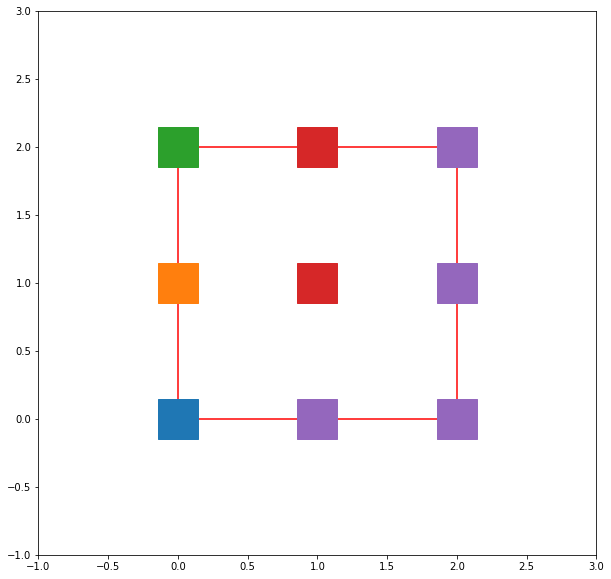

In [72]:
plot_blocks(output)
print(f'Tested {c} combinations')

In [80]:
c

82